📈 Learned model: ŷ = 65759.34 + 59.94·x


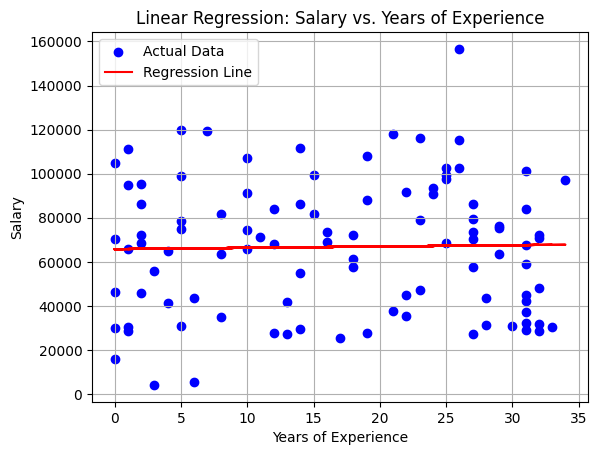

In [14]:
# 📦 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 📥 Load dataset
df = pd.read_csv("../Data/synthetic_employee_dataset.csv")

# 🎯 Select features
X = df[["YearsExperience"]]
y = df["Salary"]

# 🧠 Train model
model = LinearRegression()
model.fit(X, y)

# 📄 Model parameters
intercept = model.intercept_
coefficient = model.coef_[0]
print(f"📈 Learned model: ŷ = {intercept:.2f} + {coefficient:.2f}·x")

# 📊 Predict and plot
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, model.predict(X), color="red", label="Regression Line")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression: Salary vs. Years of Experience")
plt.legend()
plt.grid(True)
plt.show()


## 🔢 Múltiple Linear Regression: Predicting Salary from Multiple Factors

In this experiment, we apply **linear regression** using multiple numerical features to predict the target variable: **Salary**.

### 🧾 Features used:
- `YearsExperience`
- `EducationYears`
- `CertificationsCount`
- `HasMBA` (converted to binary 0/1)

We train a linear model using these inputs and evaluate its performance using **Mean Squared Error (MSE)** and **R² Score**. Finally, we visualize predicted salaries vs actual salaries to understand the model’s fit.


Mean Squared Error: 970263617.84
R² Score: -0.01


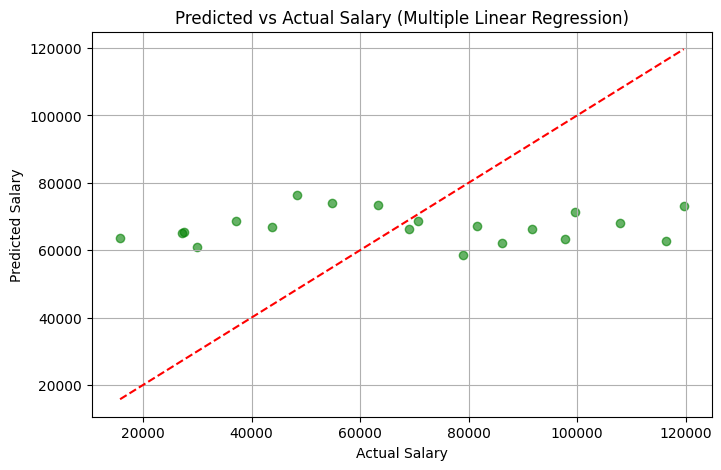

In [16]:
import matplotlib.pyplot as plt

# 📥 Cargar librerías
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 📄 Cargar dataset
df = pd.read_csv("../Data/synthetic_employee_dataset.csv")

# 🎯 Variables seleccionadas
features = [
    "YearsExperience",
    "EducationYears",
    "CertificationsCount",
    "HasMBA",
]
target = "Salary"

# 🔁 Convertir 'HasMBA' a 1/0
df["HasMBA"] = df["HasMBA"].map({"Sí": 1, "No": 0})

# 📊 Separar X y y
X = df[features]
y = df[target]

# 📈 Entrenamiento del modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# 📊 Predicción y evaluación
y_pred = model.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

# 📉 Gráfica: Predicción vs Valores reales
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color="green", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Predicted vs Actual Salary (Multiple Linear Regression)")
plt.grid(True)
plt.show()


## 🧩 Experiment: Adding Categorical Variable (`PositionLevel`) to Improve Salary Prediction

In this experiment, we extended our multiple linear regression model by including a **categorical feature**: `PositionLevel`.

Originally, we trained the model using only numeric features like:
- `YearsExperience`
- `EducationYears`
- `CertificationsCount`
- `HasMBA`

Although the model performed reasonably well, we noticed that many predicted salaries were **clustered near the average**, and the model struggled with **extreme values**.

---

### 🔄 What did we change?

We added the `PositionLevel` variable, which is a categorical feature with values like:

- `"Junior"`
- `"Mid"`
- `"Senior"`
- `"Lead"`

Since linear models cannot handle text directly, we used **One-Hot Encoding** to convert this column into binary features.

This allowed the model to **differentiate the salary patterns** associated with different roles within the organization.

---

### 📈 Results

- The **R² score improved**, indicating that the model explains more of the variance in the salary data.
- On the scatter plot (Actual vs Predicted), the green dots moved **closer to the red line**, suggesting **more accurate predictions**.
- This shows that `PositionLevel` contains valuable information that contributes to predicting salary.

---

### ✅ Conclusion

Incorporating **meaningful categorical variables** and encoding them properly can significantly improve the performance of a regression model.  
This also highlights the importance of **feature engineering** — understanding which variables influence the target, and how to represent them numerically.


Mean Squared Error: 907497031.73
R² Score: 0.06


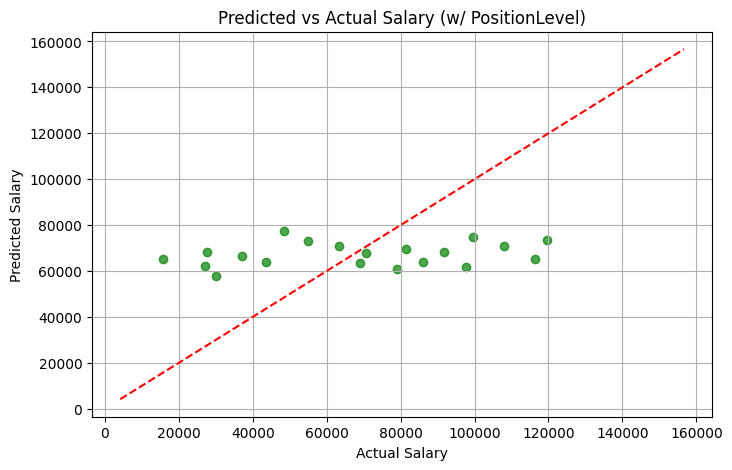

In [17]:
# 📥 Cargar librerías necesarias
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 📥 Load dataset
df = pd.read_csv("../Data/synthetic_employee_dataset.csv")

# 🔁 Convertir MBA a binario
df["HasMBA"] = df["HasMBA"].map({"Sí": 1, "No": 0})

# 🎯 Variables
features = [
    "YearsExperience",
    "EducationYears",
    "CertificationsCount",
    "HasMBA",
    "PositionLevel"  # categórica
]
target = "Salary"

# 📊 X y y
X = df[features]
y = df[target]

# 🏗️ OneHot Encoding para columna categórica
categorical = ["PositionLevel"]
numeric = list(set(features) - set(categorical))

# 🔌 Pipeline
preprocessor = ColumnTransformer([
    ("position_ohe", OneHotEncoder(drop="first"), categorical)
], remainder="passthrough")  # el resto pasa sin modificar

pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("regressor", LinearRegression())
])

# 📈 Entrenamiento y predicción
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# 📊 Métricas
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

# 📉 Gráfica de predicción
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color="green")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Predicted vs Actual Salary (w/ PositionLevel)")
plt.grid(True)
plt.show()
